**Intro**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

**Data Cleaning/ Preprocess the Data**

In [2]:
#Read data and remove non-US cities
df = pd.read_csv("/kaggle/input/historical-hourly-weather-data/temperature.csv", delimiter = ",")
df = df.drop('Vancouver', axis=1)
df = df.drop('Toronto', axis=1)
df = df.drop('Beersheba', axis=1)
df = df.drop('Montreal', axis=1)
df = df.drop('Tel Aviv District', axis=1)
df = df.drop('Eilat', axis=1)
df = df.drop('Haifa', axis=1)
df = df.drop('Nahariyya', axis=1)
df = df.drop('Jerusalem', axis=1)

df.head(3)

,datetime,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Philadelphia,New York,Boston
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,283.850000,294.030000,284.030000,298.17000,288.650000,299.720000,281.000000,285.630000,288.220000,287.170000
2,2012-10-01 14:00:00,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,283.889394,294.035341,284.069789,298.20523,288.650172,299.732518,281.024767,285.663208,288.247676,287.186092


In [3]:
df.describe()

,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Philadelphia,New York,Boston
count,45252.000000,44460.000000,45250.000000,45250.000000,45252.000000,45252.000000,45250.000000,45252.000000,45252.000000,45252.000000,...,45246.000000,45247.000000,45252.000000,45252.000000,45250.000000,44448.000000,45250.000000,45250.000000,44460.000000,45250.000000
mean,284.992929,288.155821,284.409626,290.846116,290.215044,292.424887,295.493358,285.617856,282.839407,293.785646,...,284.771904,289.772673,282.971668,294.333380,288.897483,298.181274,284.053939,285.374168,285.400406,283.779823
std,7.452438,5.332862,6.547986,6.460823,5.889992,10.829522,9.916743,9.853484,10.673464,8.303688,...,11.043634,8.703643,11.034481,6.682162,9.133072,4.190185,10.453927,10.242377,10.220932,9.802499
min,262.370000,272.300000,263.780000,266.503667,265.783333,260.561333,266.059000,255.042333,247.727667,265.050000,...,244.866333,259.500000,243.483333,268.610000,255.658333,275.233333,249.422667,250.390000,250.774000,249.540000
25%,279.850000,284.670000,279.830000,286.380000,286.254750,283.920000,287.680000,277.970000,275.060000,288.600000,...,276.110000,283.320417,274.690000,290.040875,282.010000,296.030000,275.857427,277.350636,277.370000,276.090000
50%,284.320000,287.610000,283.940000,290.530000,290.118750,292.027486,295.586667,286.120000,282.970667,295.184250,...,285.929333,291.050000,283.540000,295.640000,290.120000,298.880000,285.220000,285.927583,285.870000,284.133250
75%,289.451750,291.015167,288.530000,295.080000,294.107542,300.835000,303.050000,292.835643,290.680000,299.490000,...,293.960000,296.290000,292.231250,299.140000,295.770000,300.992375,292.580000,293.796000,293.760000,291.620000
max,312.520000,313.620000,307.300000,315.470000,313.360000,318.640000,321.220000,312.710000,313.750000,313.660000,...,312.040000,310.760000,308.050000,310.150000,310.900000,308.680000,306.290000,308.000000,310.240000,308.000000


In [4]:
#Take all hourly US city temperatures and condense into a single hourly US average temperature column
df['USAvgTemp'] = df[['Portland', 'San Francisco', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh', 'Philadelphia', 'New York', 'Boston']].mean(axis=1)
df = df.loc[:,[ 'datetime','USAvgTemp']]
df.head(3)

,datetime,USAvgTemp
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,288.471111
2,2012-10-01 14:00:00,288.487097


In [5]:
#Convert from hourly measurements to daily averages
df['DATE'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
davg_df = df.groupby(pd.Grouper(freq='D', key='DATE')).mean(numeric_only=True)


# monthly
#davg_df2 = df.groupby(pd.Grouper(freq='M', key='DATE')).mean()

davg_df.head(3)

,USAvgTemp
DATE,
2012-10-01,288.646997
2012-10-02,291.376971
2012-10-03,292.790571


In [6]:
#Remove nulls
davg_df[davg_df.isnull()]

#monthly
#davg_df2[davg_df2.isnull()]

,USAvgTemp
DATE,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
...,...
2017-11-26,NaN
2017-11-27,NaN
2017-11-28,NaN


In [7]:
davg_df['Points'] = range(0,len(davg_df.index.values))

#monthly
#davg_df2['Points'] = range(0,len(davg_df2.index.values))

In [8]:
#convert from kelvin to Fahrenheit
davg_df['USAvgTemp'] = (davg_df['USAvgTemp'] - 273.15) * 9/5 + 32

#monthly
#davg_df2['USAvgTemp'] = (davg_df2['USAvgTemp'] - 273.15) * 9/5 + 32

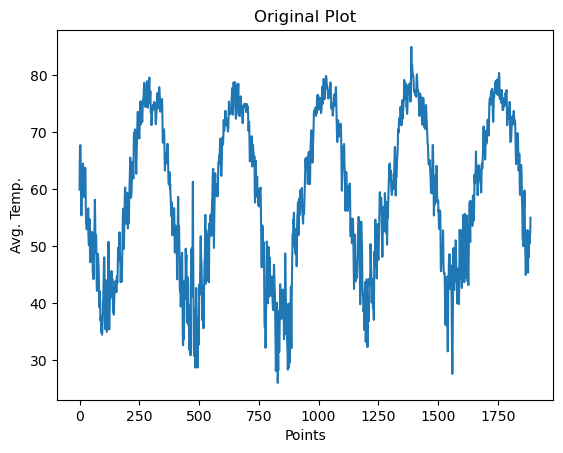

In [9]:
#plot the original figure with US average temperatures in Fahrenheit over number of data points
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Points')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Points', 'USAvgTemp', data = davg_df);

**adfuller import** to perform Augmented Dickey-Fuller Test to determine if time series data is **stationary**


In [10]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt

def stationary_ts_check(ts):
    #drop missing values from the time series
    ts = ts.dropna()

    #describe the time series
    description = ts.describe()
    print(description)

    #compute moving average with min_periods=1 (after dropping missing values)
    mov_avg = ts.rolling(window=325, min_periods=1).mean()

    #plot original and moving average/rolling mean
    plt.figure(figsize=(10, 6))
    plt.plot(ts, color='orange', label='Original data')
    plt.plot(mov_avg, color='blue', label='Moving Average')
    plt.xlabel('Time')
    plt.ylabel('Average Temperature (F)')
    plt.title('Original Time Series and Moving Average')
    plt.legend()
    plt.show()

    #Augmented Dickey-Fuller test
    print('Augmented Dickey-Fuller test:')
    adf_output = adfuller(ts)
    df_result = pd.Series(adf_output[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    df_result['p-value (Expressed in %)'] = adf_output[1] * 100  # Express p-value as a percentage
    for key, value in adf_output[4].items():
        df_result['Critical Value (%s)' % key] = value
    print(df_result)


count    1887.000000
mean       58.893479
std        13.543780
min        25.968384
25%        47.786674
50%        59.417001
75%        72.016946
max        84.938500
Name: USAvgTemp, dtype: float64


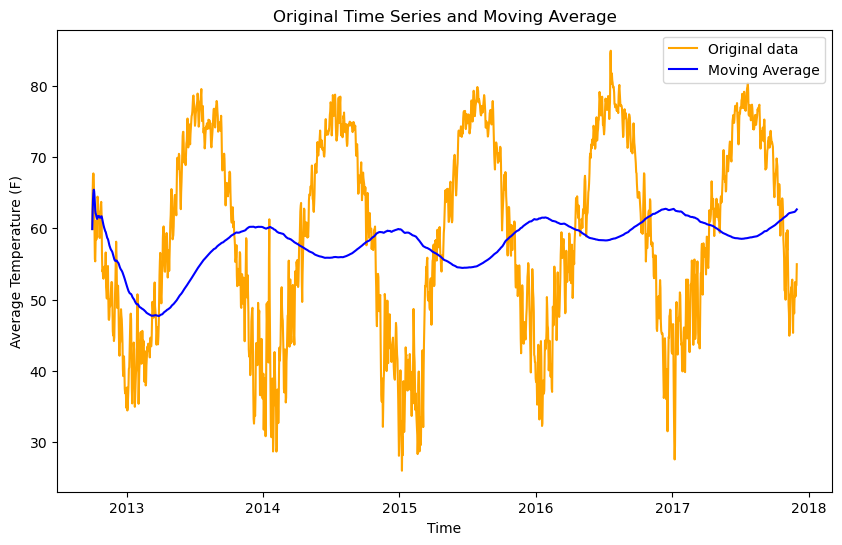

Augmented Dickey-Fuller test:
Test Statistic                   -2.438240
p-value                           0.131233
#Lags Used                       22.000000
Number of Observations Used    1864.000000
p-value (Expressed in %)         13.123293
Critical Value (1%)              -3.433863
Critical Value (5%)              -2.863092
Critical Value (10%)             -2.567596
dtype: float64


In [11]:
stationary_ts_check(davg_df.USAvgTemp)

**Original Data** - unmodified time series dataset

**Rolling Mean/ Moving Average** - Moving Average window calculated per 325 data points

**Visual check**- rolling mean appears to have significant trends/patterns - likely not stationary

**Augmented Dickey-Fuller test-** null hypothesis is rejected if p-value <5% - p value is 13%, null hypothesis not rejected. differentiating is neccessary to make dataset stationary

**Number of Observations Used** - datapoints - # of lags -1



In [12]:
davg_df.USAvgTemp.describe() #current data set summary

count    1887.000000
mean       58.893479
std        13.543780
min        25.968384
25%        47.786674
50%        59.417001
75%        72.016946
max        84.938500
Name: USAvgTemp, dtype: float64

In [13]:
len(davg_df) #length of datapoints

1887

**Diffirentiate once to make data stationary**

In [14]:
davg_df['USAvgTempDiff'] = davg_df['USAvgTemp'].diff()

#remove the first row since it will have NaN value after differencing
davg_df = davg_df.dropna()

count    1886.000000
mean       -0.002613
std         2.276339
min       -10.954721
25%        -1.219747
50%         0.091245
75%         1.240199
max        14.632360
Name: USAvgTempDiff, dtype: float64


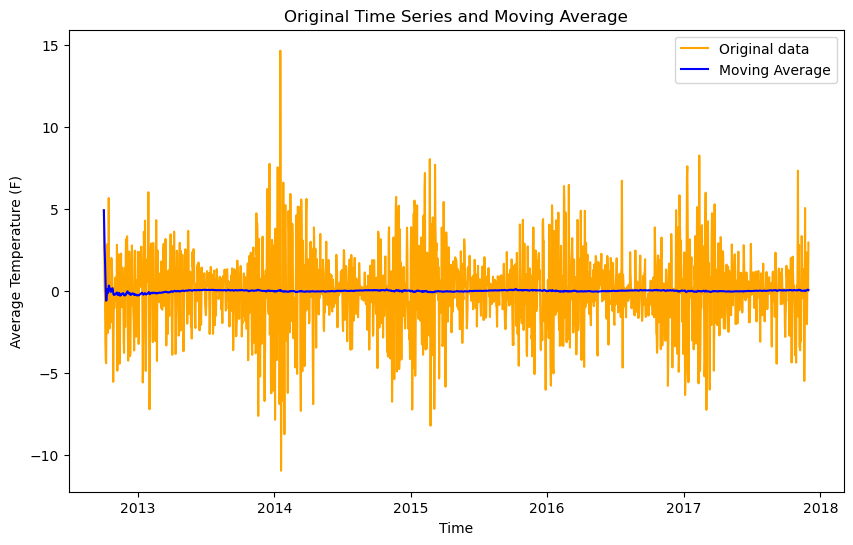

Augmented Dickey-Fuller test:
Test Statistic                -1.221944e+01
p-value                        1.116006e-22
#Lags Used                     1.600000e+01
Number of Observations Used    1.869000e+03
p-value (Expressed in %)       1.116006e-20
Critical Value (1%)           -3.433854e+00
Critical Value (5%)           -2.863088e+00
Critical Value (10%)          -2.567594e+00
dtype: float64


In [15]:
stationary_ts_check(davg_df.USAvgTempDiff) #-1 datapoint to account for differentiating


**p value is now <5%, proceed to MSE test for ARIMA parameter values p,d,q**


In [16]:
import itertools
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore", category=UserWarning) #ignore user warning regarding setting parameters as zero to avoid infinite results

p = q = range(0, 4)
d = range(0, 2)
pqd = itertools.product(p, d, q)

best_aic = np.inf
best_order = None

best_mse = np.inf
best_model = None

for param in pqd:
    try:
        model = ARIMA(davg_df['USAvgTempDiff'], order=param)
        results = model.fit()
        mse = ((results.fittedvalues - davg_df['USAvgTempDiff']) ** 2).mean()
        if mse < best_mse:
            best_mse = mse
            best_order = param
            best_model = results
        print('ARIMA{} - MSE:{}'.format(param, mse))
    except Exception as e:
        print(f"Exception occurred for ARIMA{param}: {e}")
        continue


ARIMA(0, 0, 0) - MSE:5.178972619713447
ARIMA(0, 0, 1) - MSE:4.235537586754076
ARIMA(0, 0, 2) - MSE:4.176126437164693
ARIMA(0, 0, 3) - MSE:3.9511218823838723
ARIMA(0, 1, 0) - MSE:7.153108079581328
ARIMA(0, 1, 1) - MSE:5.218466666638562
ARIMA(0, 1, 2) - MSE:4.265714415727682
ARIMA(0, 1, 3) - MSE:4.208901678794186
ARIMA(1, 0, 0) - MSE:4.684155924457069
ARIMA(1, 0, 1) - MSE:4.208147860075229
ARIMA(1, 0, 2) - MSE:3.9353013328779243
ARIMA(1, 0, 3) - MSE:3.8908443685224507
ARIMA(1, 1, 0) - MSE:7.0821289564017516
ARIMA(1, 1, 1) - MSE:4.716415472760696
ARIMA(1, 1, 2) - MSE:4.239403297773058
ARIMA(1, 1, 3) - MSE:4.263217357749577
ARIMA(2, 0, 0) - MSE:4.029342302144678
ARIMA(2, 0, 1) - MSE:4.02915478015165
ARIMA(2, 0, 2) - MSE:3.8931273119840024
ARIMA(2, 0, 3) - MSE:3.8908367631467478
ARIMA(2, 1, 0) - MSE:5.756225497071171
ARIMA(2, 1, 1) - MSE:4.061645969043365
ARIMA(2, 1, 2) - MSE:4.061403978923604
ARIMA(2, 1, 3) - MSE:3.8723973919507304
ARIMA(3, 0, 0) - MSE:4.029294576561637
ARIMA(3, 0, 1) - MS


**MSE ARIMA Order acquired: 2,1,3**


Best ARIMA Order: (2, 1, 3)
Best MSE: 3.8723973919507304


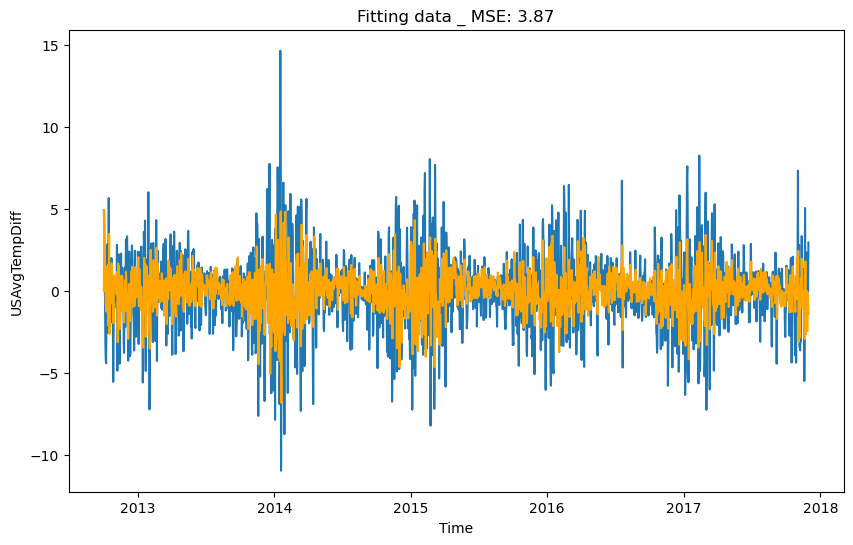

In [17]:
import itertools
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings #ignore user warning regarding setting parameters as zero to avoid infinite results

print('Best ARIMA Order:', best_order)
print('Best MSE:', best_mse)

model = ARIMA(davg_df['USAvgTempDiff'], order=(2,1,3))  
results_x = model.fit()  
plt.figure(figsize=(10, 6))
plt.plot(davg_df['USAvgTempDiff'])
plt.plot(results_x.fittedvalues, color='orange')
plt.title('Fitting data _ MSE: %.2f'% (((results_x.fittedvalues-davg_df['USAvgTempDiff'])**2).mean()))
plt.xlabel('Time')
plt.ylabel('USAvgTempDiff')
plt.show()


In [18]:
davg_df.head(10)

,USAvgTemp,Points,USAvgTempDiff
DATE,,,
2012-10-02,64.808547,1,4.913953
2012-10-03,67.353028,2,2.544480
2012-10-04,67.712417,3,0.359389
2012-10-05,67.358139,4,-0.354278
2012-10-06,64.313792,5,-3.044347
2012-10-07,60.106250,6,-4.207542
2012-10-08,55.704611,7,-4.401639
2012-10-09,55.362847,8,-0.341764
2012-10-10,58.158069,9,2.795222


In [19]:
davg_df.tail(10)

,USAvgTemp,Points,USAvgTempDiff
DATE,,,
2017-11-21,50.375000,1877,5.050875
2017-11-22,49.114656,1878,-1.260344
2017-11-23,48.054875,1879,-1.059781
2017-11-24,50.102500,1880,2.047625
2017-11-25,52.444125,1881,2.341625
2017-11-26,50.423344,1882,-2.020781
2017-11-27,50.498969,1883,0.075625
2017-11-28,52.041175,1884,1.542206
2017-11-29,52.024938,1885,-0.016238


In [20]:
predictions_x = results.predict('11/30/2017', '12/30/2017') #show daily prediction for one month after dataset

In [21]:
predictions_x

2017-11-30   -0.279803
2017-12-01    0.746513
2017-12-02   -0.997982
2017-12-03   -0.945932
2017-12-04   -0.682586
2017-12-05   -0.143864
2017-12-06    0.053192
2017-12-07    0.143008
2017-12-08    0.067135
2017-12-09    0.009839
2017-12-10   -0.044441
2017-12-11   -0.051698
2017-12-12   -0.049017
2017-12-13   -0.035536
2017-12-14   -0.029112
2017-12-15   -0.025406
2017-12-16   -0.026592
2017-12-17   -0.027930
2017-12-18   -0.029506
2017-12-19   -0.029919
2017-12-20   -0.029986
2017-12-21   -0.029676
2017-12-22   -0.029488
2017-12-23   -0.029357
2017-12-24   -0.029363
2017-12-25   -0.029390
2017-12-26   -0.029433
2017-12-27   -0.029449
2017-12-28   -0.029455
2017-12-29   -0.029448
2017-12-30   -0.029443
Freq: D, Name: predicted_mean, dtype: float64


**Proceed to Analyze data via SARIMA Model**
First thing we need is to check for seasonality, perform visual inspection on differentiated data graph for seasonal pattern

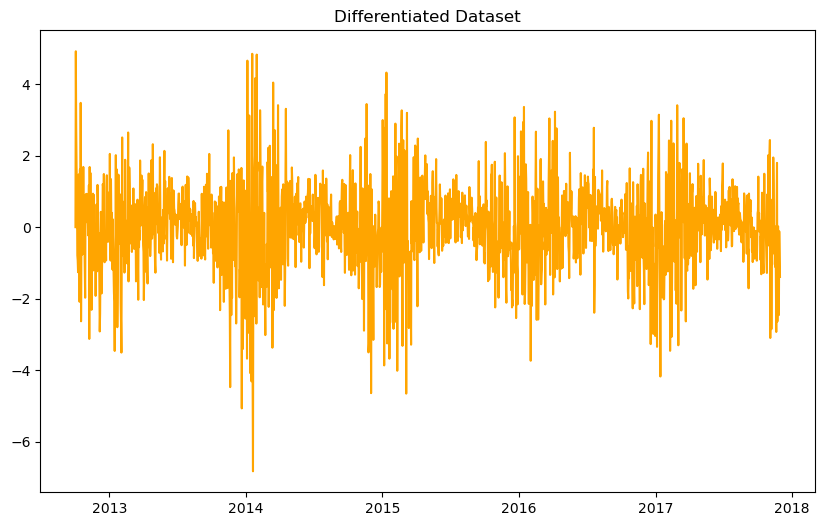

In [22]:
plt.figure(figsize = (10, 6))
plt.plot(results_x.fittedvalues, color='orange')
plt.title('Differentiated Dataset')
plt.show()

**Besides 2016-2017, Visual inspection shows there is a dip in the middle of each year which illustrates seasonality**

In [23]:
!pip install pmdarima --quiet
import pmdarima as pm

In [24]:
from pmdarima import auto_arima
sarimamodel_x = auto_arima(davg_df.USAvgTempDiff, start_p = 0, start_q = 0,D = 1, m = 12, seasonal = True, test = "adf",  trace = True, alpha = 0.05, information_criterion = 'aic', suppress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=16.61 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9737.684, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9055.632, Time=3.61 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=15.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9735.685, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=9568.494, Time=0.40 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=8789.338, Time=10.16 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=45.09 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=22.97 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=8962.228, Time=6.90 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=8501.153, Time=9.89 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=8760.951, Time=4.57 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=31.90 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=24.26 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC



**SARIMA values acquired:(2,0,0)(2,1,0)[12]**


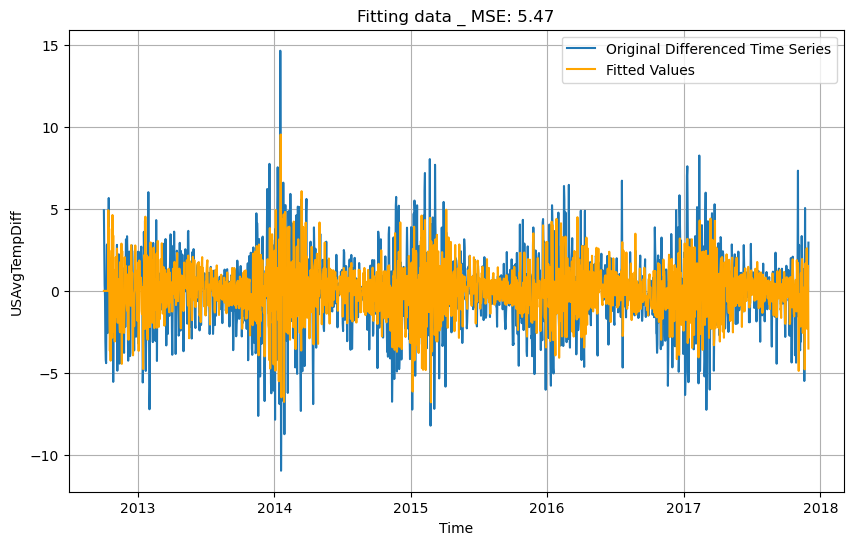

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 2, 1, 3
P, D, Q, s = 1, 1, 1, 12

#create the SARIMA model with the specified seasonal and non-seasonal orders
sarima_model = SARIMAX(davg_df['USAvgTempDiff'], order=(2, 0, 0), seasonal_order=(2, 1, 0, 12))
results = sarima_model.fit(disp=False)

plt.figure(figsize=(10, 6))
plt.plot(davg_df['USAvgTempDiff'], label='Original Differenced Time Series')

plt.plot(results.fittedvalues, color='orange', label='Fitted Values')

#MSE calculation for SARIMA model
mse = ((results.fittedvalues - davg_df['USAvgTempDiff'])**2).mean()
plt.title(f'Fitting data _ MSE: {mse:.2f}')
plt.xlabel('Time')
plt.ylabel('USAvgTempDiff')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#future predictions
predictions = results.predict('11/30/2017', '12/30/2017') #show daily prediction for one month after dataset

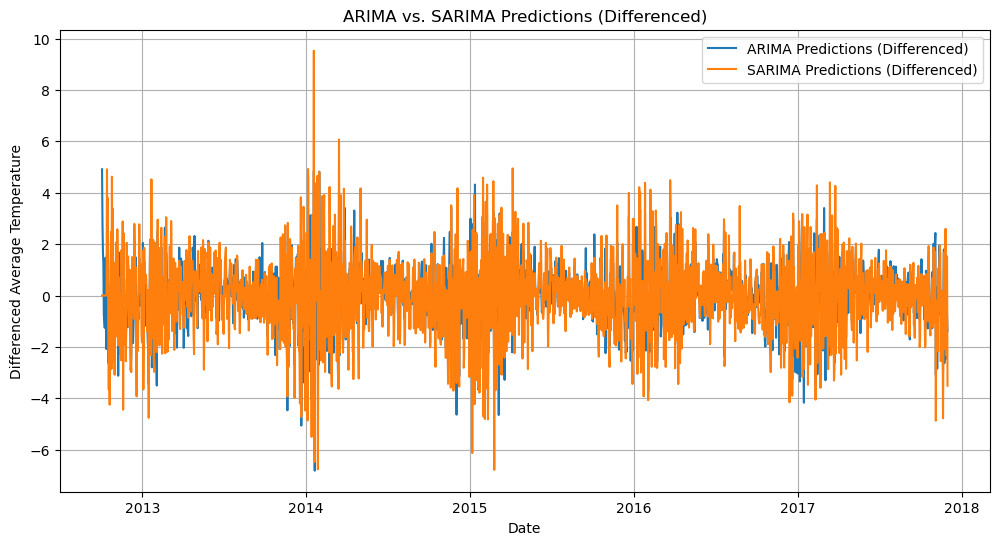

In [27]:
# Plot the differenced predictions for ARIMA and SARIMA
plt.figure(figsize=(12, 6))
plt.plot(davg_df.index[1:], results_x.fittedvalues[1:], label='ARIMA Predictions (Differenced)')
plt.plot(davg_df.index[1:], results.fittedvalues[1:], label='SARIMA Predictions (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Average Temperature')
plt.title('ARIMA vs. SARIMA Predictions (Differenced)')
plt.legend()
plt.grid(True)
plt.show()

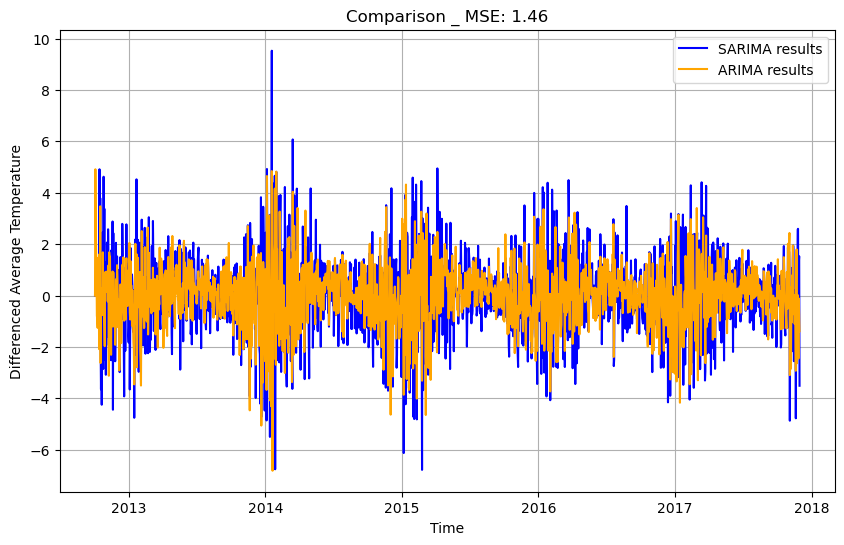

In [28]:
plt.figure(figsize=(10, 6))

plt.plot(results.fittedvalues, color='blue', label='SARIMA results')
plt.plot(results_x.fittedvalues, color='orange', label='ARIMA results')

#MSE calculation for ARIMA and SARIMA models comparison
mse = ((results.fittedvalues - results_x.fittedvalues)**2).mean()
plt.title(f'Comparison _ MSE: {mse:.2f}')
plt.xlabel('Time')
plt.ylabel('Differenced Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
sarimaforecast = predictions
arimaforecast = predictions_x

In [30]:
def inverse_difference(series_diff, first_value):
    return np.r_[first_value,series_diff].cumsum().astype('float64')

sinv = inverse_difference(predictions, davg_df['USAvgTemp'][0])
ainv = inverse_difference(predictions_x, davg_df['USAvgTemp'][0])

for i in range(len(predictions)):
    sarimaforecast[i] = sinv[i]
    
for i in range(len(predictions_x)):
    arimaforecast[i] = ainv[i]

In [31]:
sarimaforecast

2017-11-30    64.808547
2017-12-01    61.296143
2017-12-02    60.554492
2017-12-03    57.181848
2017-12-04    55.425617
2017-12-05    53.791000
2017-12-06    54.200344
2017-12-07    55.591309
2017-12-08    57.592799
2017-12-09    59.626906
2017-12-10    59.280400
2017-12-11    59.339318
2017-12-12    60.800885
2017-12-13    60.591307
2017-12-14    57.338922
2017-12-15    54.308800
2017-12-16    54.859379
2017-12-17    52.813972
2017-12-18    52.825728
2017-12-19    55.136147
2017-12-20    57.160012
2017-12-21    57.315523
2017-12-22    57.490152
2017-12-23    57.827829
2017-12-24    58.773353
2017-12-25    59.710423
2017-12-26    56.426309
2017-12-27    53.671068
2017-12-28    55.147179
2017-12-29    53.518334
2017-12-30    53.262133
Freq: D, Name: predicted_mean, dtype: float64

In [32]:
arimaforecast

2017-11-30    64.808547
2017-12-01    64.528744
2017-12-02    65.275258
2017-12-03    64.277275
2017-12-04    63.331343
2017-12-05    62.648758
2017-12-06    62.504893
2017-12-07    62.558085
2017-12-08    62.701093
2017-12-09    62.768228
2017-12-10    62.778067
2017-12-11    62.733626
2017-12-12    62.681928
2017-12-13    62.632912
2017-12-14    62.597375
2017-12-15    62.568264
2017-12-16    62.542858
2017-12-17    62.516265
2017-12-18    62.488335
2017-12-19    62.458829
2017-12-20    62.428910
2017-12-21    62.398924
2017-12-22    62.369248
2017-12-23    62.339760
2017-12-24    62.310403
2017-12-25    62.281040
2017-12-26    62.251650
2017-12-27    62.222217
2017-12-28    62.192768
2017-12-29    62.163314
2017-12-30    62.133865
Freq: D, Name: predicted_mean, dtype: float64

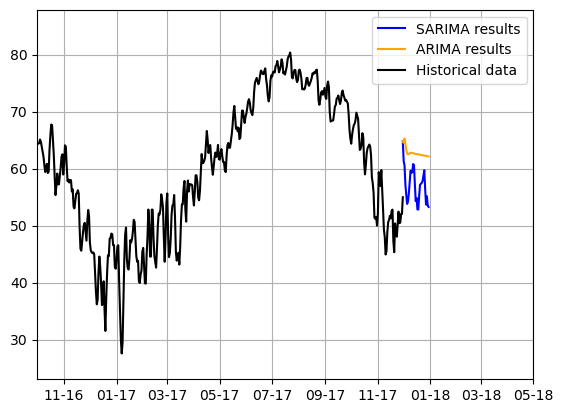

In [33]:
import datetime as dt
import matplotlib.dates as mdates

#stest = sarimaforecast[3:]
#atest = arimaforecast[3:]
#plt.plot(stest, color='blue', label='SARIMA test results')
#plt.plot(atest, color='orange', label='ARIMA test results')

plt.plot(sarimaforecast, color='blue', label='SARIMA results')
plt.plot(arimaforecast, color='orange', label='ARIMA results')
plt.plot(davg_df['USAvgTemp'], color='black', label='Historical data')
left = dt.date(2016, 10, 1)
right = dt.date(2018, 5, 1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
plt.gca().set_xbound(left, right)
plt.legend()
plt.grid(True)